In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,I Saw Mommy Kissing Santa Claus,2002
1,"Bikini-Blitzkrieg, Part One: Dance Domination",2006
2,Kirk kulok siri,1992
3,The Story of Jonah and the Whale (Sort of...),2010
4,Church of Redemption,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

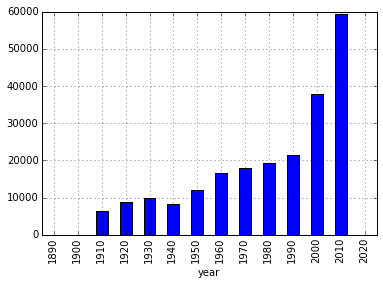

In [13]:
t = titles
u = t.groupby(t.year // 10 * 10).size()
u.plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

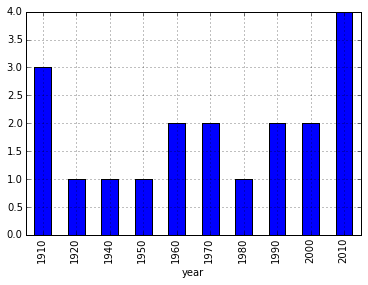

In [15]:
t = titles[t.title=='Hamlet']
u = t.groupby(t.year // 10 * 10).size()
u.plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [21]:
c=cast
c=c[c.n==1]
c=c[c.year // 10 == 195]
c=c.groupby(['year','type']).n.size()
c

year  type   
1950  actor      606
      actress    276
1951  actor      635
      actress    273
1952  actor      591
      actress    284
1953  actor      633
      actress    293
1954  actor      630
      actress    297
1955  actor      610
      actress    267
1956  actor      618
      actress    289
1957  actor      710
      actress    285
1958  actor      697
      actress    276
1959  actor      682
      actress    293
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [85]:
c=cast
c=c[c.n<=5]
c=c[c.year // 10 == 195]
c=c.groupby(['n','type']).n.size()
c

n  type   
1  actor      6412
   actress    2833
2  actor      4407
   actress    4421
3  actor      5432
   actress    3037
4  actor      5434
   actress    2758
5  actor      5458
   actress    2460
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [90]:
c=cast
c=c[c.title.str.startswith('The Pink Panther')]
c=c.groupby(['title','year']).n.max() #character.size()
c

title                           year
The Pink Panther                1963    15
                                2006    50
                                2016   NaN
The Pink Panther 2              2009    36
The Pink Panther Strikes Again  1976    60
Name: n, dtype: float64

In [27]:
len(titles)

218513

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [92]:
c = cast
c = c[c.name =='Frank Oz']
g = c.groupby(['year','title']).size()
#c.sort('year')
g[g > 1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [95]:
c=cast
c=c[c.name=='Frank Oz']
g = c.groupby('character').size() 
g[g>1].order()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Yoda              5
Animal            6
Miss Piggy        6
dtype: int64